In [46]:
import numpy as np
import plotly.graph_objects as go
import utils
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Zadanie 1 (4 pkt) 
Przeprowadź test T studenta na danych w pliku wyniki.csv


In [9]:
wyniki_df = pd.read_csv("/content/wyniki.csv")

In [10]:
wyniki_df.head()

,plec,ocena_koncowa
0,F,6
1,F,6
2,F,10
3,F,15
4,F,10


In [21]:
wyniki_df.groupby('plec').agg(['mean', 'std', 'count'])

ocena_koncowa                
              mean       std count
plec                              
F        11.205405  3.174452   185
M        11.866279  3.258748   172

**Hipoteza zerowa** brzmi: nie ma istotnej różnicy w Ocenie końcowej pomiędzy uczniami i uczennicami.

**Hipoteza alternatywna** brzmi: istnieje istotna różnica (bez wskazania kierunku) w Ocenie końcowej pomiędzy uczniami i uczennicami.

Przyjmij significance level (alpha) na poziomie 0.05. Czy uda się odrzucić hipotezę zerową?


In [36]:
mean_F = wyniki_df[wyniki_df.plec=='F']['ocena_koncowa'].mean()
mean_M = wyniki_df[wyniki_df.plec=='M']['ocena_koncowa'].mean()
std_F = wyniki_df[wyniki_df.plec=='F']['ocena_koncowa'].std()
std_M = wyniki_df[wyniki_df.plec=='M']['ocena_koncowa'].std()
count_F = wyniki_df[wyniki_df.plec=='F']['ocena_koncowa'].count()
count_M = wyniki_df[wyniki_df.plec=='M']['ocena_koncowa'].count()

In [41]:
t_stat = (mean_M - mean_F) / np.sqrt(((std_F**2)/count_F) + ((std_M**2)/count_M))

In [42]:
print(t_stat)

1.9386213026002415


Tablica online t dla dwustronnego testu t z α=0.05 dla df=172−1=171 daje mi wartość krytyczną tcrit=1,9759. (zaokrągliłam 171 do 150)

t_satystyka < t_crit

Czyli nie mogę odrzucić hipotezy zerowej, czyli nie ma istotnej różnicy w ocenie końcowej między płciami

z użyciem scipy:

In [64]:
stats.ttest_ind(wyniki_df[wyniki_df.plec=='F']['ocena_koncowa'], wyniki_df[wyniki_df.plec=='M']['ocena_koncowa'])

Ttest_indResult(statistic=-1.9404771273257526, pvalue=0.053113174845791505)

p-val> 0.05 => zakładam, że hipoteza zerowa jest prawdziwa

##Zadanie 2 (2 pkt)
Korzystając z danych w pliku ZyskiFirmyX.csv stwórz model regresji liniowej i biblioteki statmodels:


In [44]:
zyski_df = pd.read_csv("/content/ZyskiFirmyX.csv")

In [45]:
zyski_df.head()

,Rok,Zysk
0,1821,1645
1,1822,658
2,1823,1926
3,1824,865
4,1825,764


•	Wyświetl wykres pokazujący zyski w czasie. 

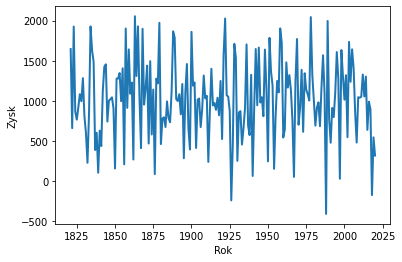

In [58]:
fig, ax = plt.subplots()

ax.plot(zyski_df['Rok'], zyski_df['Zysk'], linewidth=2.0)
plt.xlabel("Rok")
plt.ylabel("Zysk")
plt.show()

•	Czy da się zaobserwować trend? Jaki?

Zysk bardzo mocno zmienia się zależnie od roku działania firmy, nie jest liniowo zależny od czasu

•	Wyświetl podsumowanie modelu.

In [59]:
import statsmodels.api as sm
x = zyski_df[['Rok']]
y = zyski_df['Zysk']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   Zysk   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.09357
Date:                Sun, 22 Jan 2023   Prob (F-statistic):              0.760
Time:                        22:46:11   Log-Likelihood:                -1521.3
No. Observations:                 200   AIC:                             3047.
Df Residuals:                     198   BIC:                             3053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1373.8795   1150.888      1.194      0.2

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 = 0 => model jest bezużyteczny, co przy tych danych ma sens, nie ma w nich liniowej zależności

##Zadanie 3 (6 pkt) 
Korzystając z danych w pliku spendingscores.csv i biblioteki statmodels:


In [88]:
spending_df = pd.read_csv("/content/spendingscores.csv")

In [89]:
spending_df.head()

,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


1.	stwórz model regresji liniowej, gdzie zmienną zależną jest Spending score, a zmiennymi niezależnymi pozostałe zmienne.



In [90]:
import statsmodels.api as sm
spending_df['Gender'].replace(['Male', 'Female'],
                        [0, 1], inplace=True)

x = spending_df[['Gender', 'Age', 'AnnualIncome']]
y = spending_df['SpendingScore']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:          SpendingScore   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     7.960
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           4.91e-05
Time:                        23:59:23   Log-Likelihood:                -922.05
No. Observations:                 200   AIC:                             1852.
Df Residuals:                     196   BIC:                             1865.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           71.9168      7.023     10.240   

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


2.	Z modelu wyświetl:
a.	p values
b.	standard dev
c.	coefficients

In [102]:
print("P-Value dla zmiennej Gender: ", model.pvalues.loc['Gender'])
print("P-Value dla zmiennej Age: ", model.pvalues.loc['Age'])
print("P-Value dla zmiennej AnnualIncome: ", model.pvalues.loc['AnnualIncome'])
print("Std dla zmiennej Gender: ", model.bse.loc['Gender'])
print("Std dla zmiennej Age: ", model.bse.loc['Age'])
print("Std dla zmiennej AnnualIncome: ", model.bse.loc['AnnualIncome'])


P-Value dla zmiennej Gender:  0.5671171873105415
P-Value dla zmiennej Age:  3.05517723991189e-06
P-Value dla zmiennej AnnualIncome:  0.9050939326884474
Std dla zmiennej Gender:  3.5118254057794505
Std dla zmiennej Age:  0.12491583182546849
Std dla zmiennej AnnualIncome:  0.06641961047071174


In [106]:
df = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]
print("Coef dla zmiennej Gender: ", df['coef'].values[1])
print("Coef dla zmiennej Age: ", df['coef'].values[2])
print("Coef dla zmiennej AnnualIncome: ", df['coef'].values[3])

Coef dla zmiennej Gender:  2.0132
Coef dla zmiennej Age:  -0.6004
Coef dla zmiennej AnnualIncome:  0.0079


3.	Sprawdź czy istnieje korelacja pomiędzy zmiennymi. Pokaż to na wykresie, np. z biblioteki plotly express.


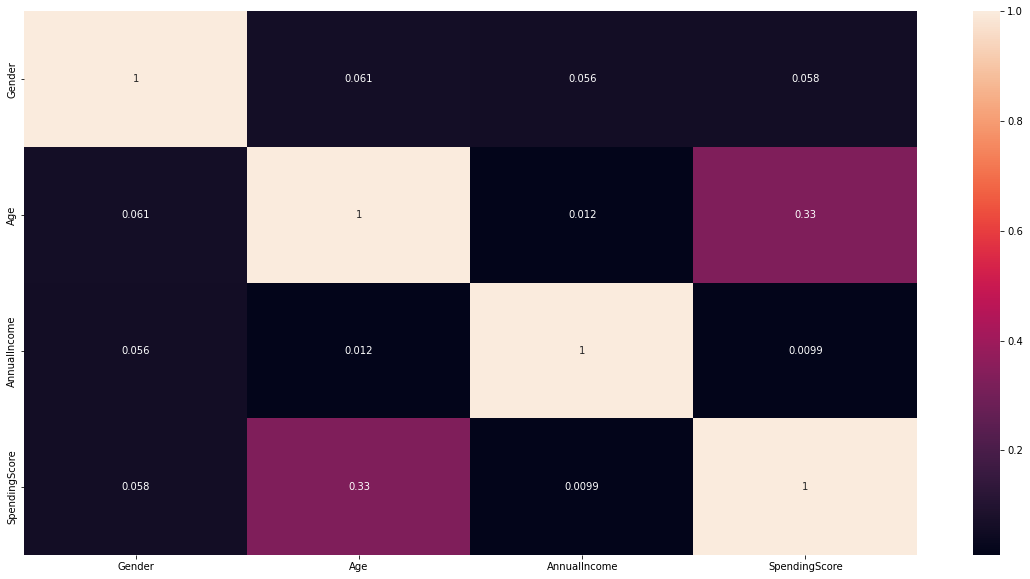

In [107]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(spending_df.corr().abs(),  annot=True)

4.	Korzystając z eliminacji wstecznej usuń najmniej istotną zmienną i jeszcze raz wyświetl model.


In [108]:
spending_df.drop(['AnnualIncome'], axis=1)

,Gender,Age,SpendingScore
0,0,19,39
1,0,21,81
2,1,20,6
3,1,23,77
4,1,31,40
...,...,...,...
195,1,35,79
196,1,45,28
197,0,32,74
198,0,32,18


In [109]:
x = spending_df[['Gender', 'Age']]
y = spending_df['SpendingScore']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:          SpendingScore   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     11.99
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           1.22e-05
Time:                        00:11:32   Log-Likelihood:                -922.05
No. Observations:                 200   AIC:                             1850.
Df Residuals:                     197   BIC:                             1860.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.4197      5.605     12.920      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
